In [41]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [42]:
#read dataset csv file.
df = pd.read_csv('weatherHistory.csv')

In [43]:
# find the features and observation in the data set.
df.shape

(96453, 12)

In [44]:
train = df[:int(df.shape[0]*.70)]
test = df[(int(df.shape[0]*.70)) + 1:]

In [45]:
df.columns
df = df.drop(['Formatted Date', 'Summary', 'Precip Type',
        'Loud Cover', 'Daily Summary'], axis=1)

In [46]:
# find the datatypes of the features and target variable. 
df.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
dtype: object

In [47]:
df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [48]:
df.head()
#Here our feature varibale is Humidity and target variable is Temperature (C)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [49]:
#rename the Temperature column with Temp.
df.rename(columns= {"Temperature (C)": "Temp"}, inplace=True)

In [50]:
df.head()

,Temp,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [51]:
df.describe()

,Temp,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
Temp                        96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
dtypes: float64(7)
memory usage: 5.2 MB


In [53]:
# Replace the nan values with median of column 'Temp'
df['Temp'] = df['Temp'].replace(0, np.NaN)

In [54]:
# Check the null values in the dataset
df.isnull().any()

Temp                         True
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
dtype: bool

In [55]:
# Check the nan values in the dataset
df.isna().sum()

Temp                        325
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [56]:
df['Temp'] = (df['Temp'] * 9/5) + 32

In [57]:
df.head()

,Temp,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,49.05,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,48.84,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,48.88,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,46.92,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,47.76,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [58]:
df.describe()

,Temp,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96128.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,53.551439,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,17.176325,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-7.280000,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.670000,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,53.680000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,65.920000,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,103.830000,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [59]:
# Replace the nan values with median of column 'Temp'
df['Temp'] = df['Temp'].replace(0, np.NaN)

In [60]:
# Check the nan values in the dataset
df.isna().sum()

Temp                        325
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [61]:
# Replace the nan values with median of column 'Temp'
df['Humidity'] = df['Humidity'].replace(0, np.NaN)

In [62]:
# Check the null values in the dataset
df.isnull().any()

Temp                         True
Apparent Temperature (C)    False
Humidity                     True
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
dtype: bool

In [63]:
# Check the nan values in the dataset
df.isna().sum()

Temp                        325
Apparent Temperature (C)      0
Humidity                     22
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [64]:
df['Humidity'] = df['Humidity'].replace(np.NaN, df['Humidity'].median())
df['Temp'] = df['Temp'].replace(np.NaN, df['Temp'].median())

In [65]:
# df['Temp'].replace(0, np.nan, inplace= True)
df.isna().sum()

Temp                        0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [66]:
# Sum the duplicated values in the dataset
df.duplicated().sum()

73

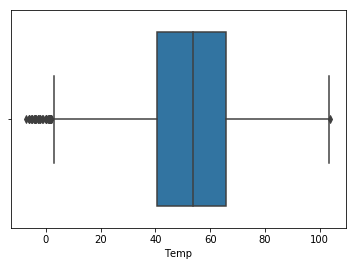

In [67]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Temp'])

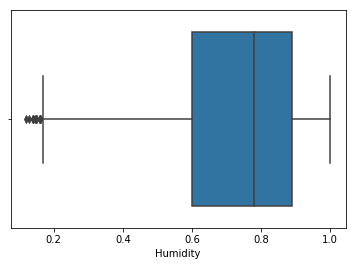

In [68]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Humidity'])

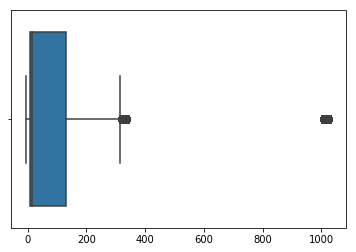

In [69]:
# Remove the outlier from the whole dataset
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df= remove_outlier(df)
sns.boxplot(df)

(array([ 1872.,  2251.,  2794.,  3230.,  3833.,  4648.,  6084.,  7574.,
         8947., 10860.]),
 array([0.36, 0.42, 0.48, 0.54, 0.6 , 0.66, 0.72, 0.78, 0.84, 0.9 , 0.96]),
 <a list of 10 Patch objects>)

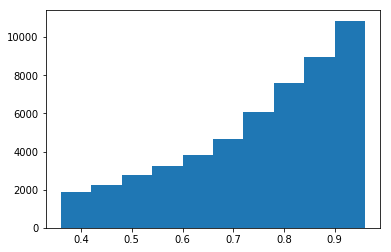

In [70]:
# Histrogram of the feature varibale
plt.hist(df['Humidity'])

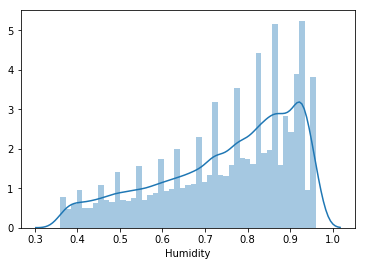

In [71]:
# Distplot of the feature varibale
sns.distplot(df['Humidity'])

In [72]:
# Mean and median of the Humidity column 
print("Mean is", df['Humidity'].mean(), df['Humidity'].skew(), ", Median is ", df['Humidity'].median(), "which shows that column data are skwed data")

Mean is 0.749504923886115 -0.6738654893586848 , Median is  0.79 which shows that column data are skwed data


Skewness is -0.35054121505800145
0.5871031155818405 0.6241000000000001


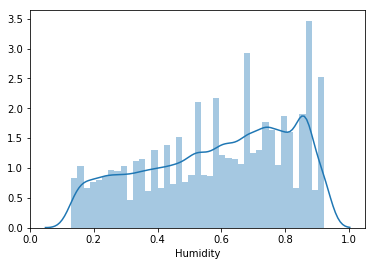

In [73]:
# now transforming feature variable
target = (np.square((df['Humidity'])))
print ('Skewness is', target.skew())
sns.distplot(target)
print(target.mean(), target.median())
df['Humidity'] = target

(array([2643., 5111., 5572., 6550., 6479., 6788., 6625., 5559., 4063.,
        2703.]),
 array([27.03 , 32.526, 38.022, 43.518, 49.014, 54.51 , 60.006, 65.502,
        70.998, 76.494, 81.99 ]),
 <a list of 10 Patch objects>)

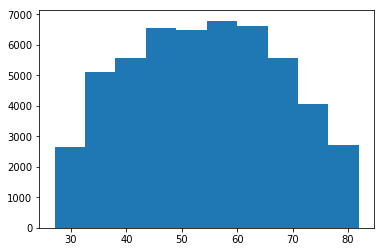

In [74]:
# Histrogram of the target varibale
plt.hist(df['Temp'])

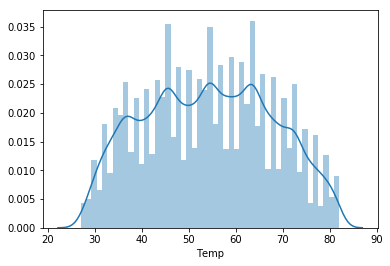

In [75]:
# Distplot of the feature varibale
sns.distplot(df['Temp'])

In [76]:
print("Mean is", df['Temp'].mean(), ", Median is ", df['Temp'].median(), df['Temp'].skew())

Mean is 54.17830687424442 , Median is  54.16 0.029857826956317474


Skewness is -0.24252113217298207
3.7565369059266294 3.7834925681371483


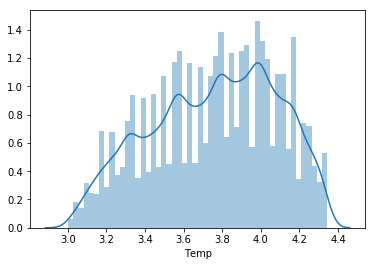

In [77]:
# now transforming feature variable
target = (np.cbrt((df['Temp'])))
print ('Skewness is', target.skew())
sns.distplot(target)
print(target.mean(), target.median())
# df['Temp'] = target

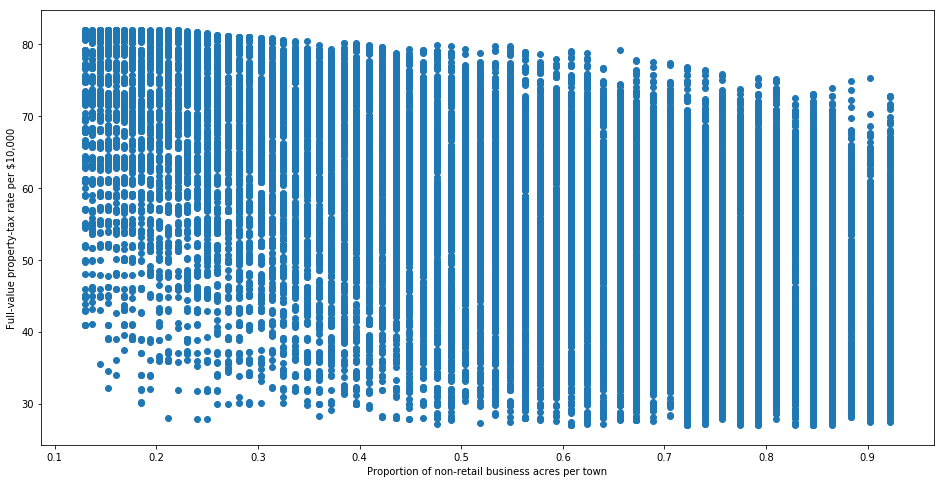

In [78]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Humidity'], df['Temp'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [79]:
#Using Python Code
class LinearTrainer:

    def __init__(self):

        # Learning Rate
        self.l_rate = 0.0001

        # Total iterations
        self.iterations = 60000

    def trains(self, x_data_train, y_data_train, theta_vector):
        x_data_train = np.column_stack((np.ones((x_data_train.shape[0], 1), dtype=float), x_data_train))
        temp2 = np.zeros(self.iterations)
        for i in range(self.iterations):
            temp = ((np.dot(x_data_train, theta_vector)) - y_data_train)
            temp = np.dot(np.transpose(x_data_train), temp)
            temp = ((temp * self.l_rate) / len(x_data_train))
            theta_vector = theta_vector - temp
            temp1 = np.power((np.dot(x_data_train, theta_vector) - y_data_train), 2)
            temp2[i] = np.sum(temp1) / 2 * len(x_data_train)

        # self.plotgraph(np.arange(self.iterations), '1 ', temp2)
        return theta_vector

    def classify(self, x_data_test, theta_vector):

        x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))

        return np.dot(x_data_test, theta_vector)

    def accuracy(self, y_data_test, y_pred_test):

        total_error = 0
        for i in range(0, len(y_data_test)):
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
        total_error = (total_error / len(y_data_test))
        accuracy = 1 - total_error
        return accuracy * 100

    def plotgraph(self, x_data_test, y_data_test, y_pred):

        # plt.scatter(x_data_test, y_data_test, color='g', label='Test Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()


def main():
   
    features = ['Temp', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
    predicted_feature = ['Apparent Temperature (C)']
    x_df = df[features]
    y_df = df[predicted_feature]

    x_df = (x_df - x_df.mean()) / x_df.std()

    x_data_set = np.array(pd.DataFrame(x_df, columns=features))
    y_data_set = np.array(pd.DataFrame(y_df, columns=predicted_feature))

    l_t = LinearTrainer()
    theta_vector = np.zeros(((len(features)+1), 1), dtype='f')
    x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_data_set, y_data_set, test_size=0.35, shuffle=False)

    parameters = l_t.trains(x_data_train, y_data_train, theta_vector)
    y_prediction = l_t.classify(x_data_test, parameters)
    y_prediction_train = l_t.classify(x_data_train, parameters)
    accuracy = l_t.accuracy(y_data_test, y_prediction)
    accuracy_train = l_t.accuracy(y_data_train, y_prediction_train)

    print("accuracy train: ", accuracy_train, "accuracy test: ", accuracy)
    print("MSE test: ", mean_squared_error(y_data_test, y_prediction))
    print("MSE train: ", mean_squared_error(y_data_train, y_prediction_train))
    # l_t.plotgraph(x_data_test, y_data_test, y_prediction)


if __name__ == '__main__':
    main()


accuracy train:  [-inf] accuracy test:  [-inf]
MSE test:  1.0600379116854055
MSE train:  1.8596739365498172


In [80]:
# Using sklearn linear regression model
from sklearn.linear_model import LinearRegression
features = ['Temp', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
predicted_feature = ['Apparent Temperature (C)']
x_data_set = np.array(pd.DataFrame(df, columns=features))
y_data_set = np.array(pd.DataFrame(df, columns=predicted_feature))

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data_set, y_data_set, test_size=0.25, shuffle=False)

model = LinearRegression()
reg = model.fit(x_data_train,y_data_train)
reg.score(x_data_test, y_data_test)
y_pred =  reg.predict(x_data_test)
accuracy = 1 - mean_absolute_error(y_data_test,y_pred)
print(accuracy)

0.33452033117753166
